In [ ]:
#Contributor AustinPaul01
#MODEL: RECURRENT NEURAL NETWORK(RNN)
#       LSTM
#       MICROSOFT CLOSING PRICE (PAST 7 DAYS STOCK PRICE)

In [ ]:
# LIBRARIES
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn. preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use( 'fivethirtyeight')

In [ ]:
!pip install --upgrade pandas-datareader

In [ ]:
import pandas_datareader
pandas_datareader.__version__  # Should show 0.10.0

'0.10.0'

In [ ]:
#DATASETS

df = web.DataReader('MSFT', data_source='av-intraday', start='2023-08-01', end='2023-08-12', api_key='https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=368NI7SFVG4K4RL0')
df


,open,high,low,close,volume
2023-08-01 04:00:00,335.29,336.07,335.22,335.41,453
2023-08-01 04:01:00,335.39,335.53,335.32,335.32,242
2023-08-01 04:02:00,335.32,335.32,335.32,335.32,5
2023-08-01 04:03:00,335.87,335.90,335.86,335.86,25
2023-08-01 04:04:00,335.54,335.80,335.54,335.80,16
...,...,...,...,...,...
2023-08-10 19:55:00,323.40,323.48,323.40,323.48,253
2023-08-10 19:56:00,323.21,323.50,323.21,323.50,79
2023-08-10 19:57:00,323.32,323.50,323.32,323.50,143
2023-08-10 19:58:00,323.40,323.50,323.40,323.47,92


In [ ]:
#ROWS AND COLS
df.shape

(7465, 5)

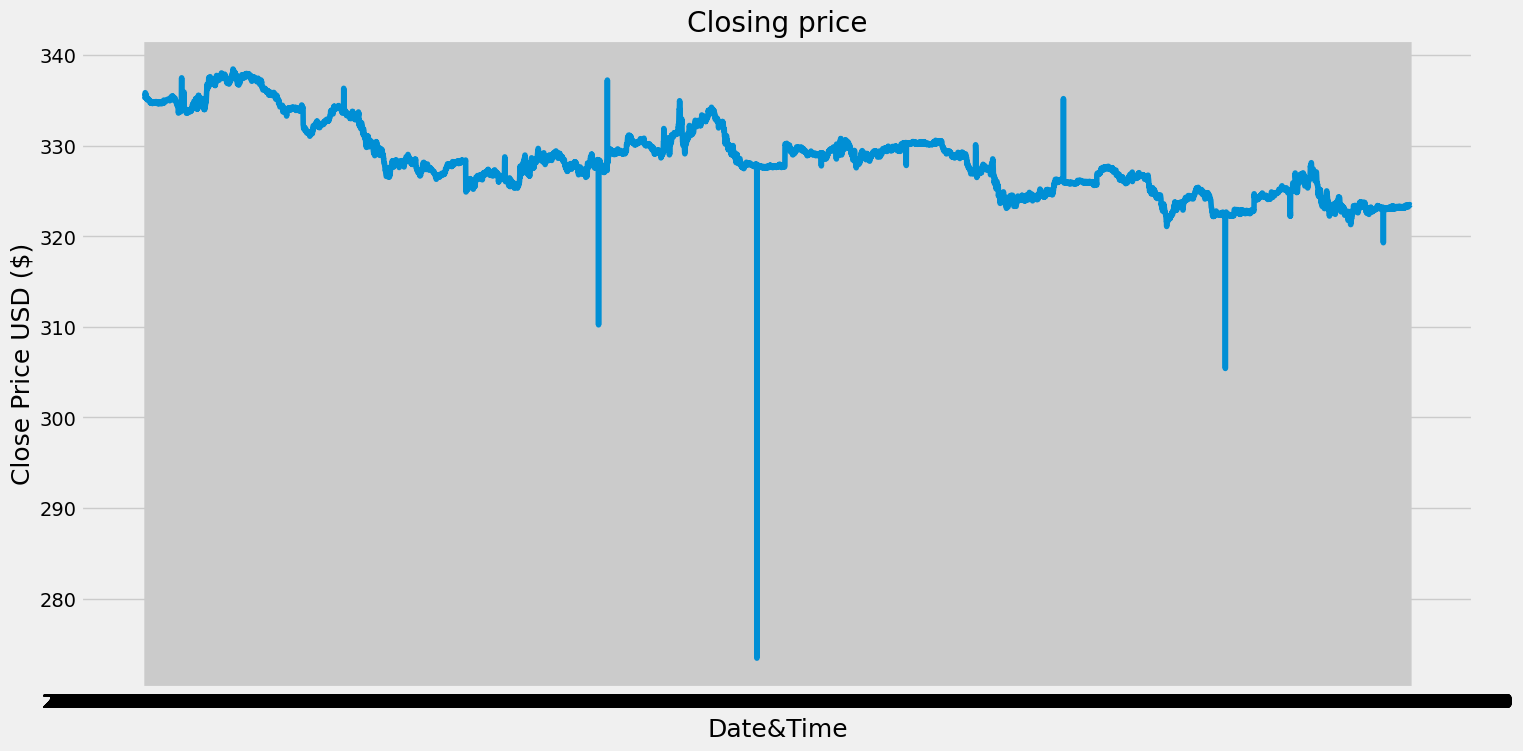

In [ ]:
#PLOTTING CLOSING PRICE
plt.figure(figsize=(16,8))
plt.title('Closing price')
plt.plot(df['close'])

plt.xlabel('Date&Time', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#CLOSE COL
data = df.filter(['close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

5972

In [ ]:
#SCALE THE DATA FOR HELPING THE MODEL 0 AND 1 INCLUSIVE
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.95295058],
       [0.95156678],
       [0.95156678],
       ...,
       [0.76982687],
       [0.7693656 ],
       [0.76982687]])

In [ ]:
#CREATE TRAINING DATASET
#CREATE THE SCALED TRAINING DATASET
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(3360, len(train_data)):
  x_train.append(train_data[i-3360:i,0 ]) # doesnot include i
  y_train.append(train_data[i, 0])
  if i <= 3361:                       #changed (increased 1 up)
    print(x_train)
    print(y_train)
    print()

[array([0.95295058, 0.95156678, 0.95156678, ..., 0.92888773, 0.92850334,
       0.92911836])]
[0.9238906485439271]

[array([0.95295058, 0.95156678, 0.95156678, ..., 0.92888773, 0.92850334,
       0.92911836]), array([0.95156678, 0.95156678, 0.95986961, ..., 0.92850334, 0.92911836,
       0.92389065])]
[0.9238906485439271, 0.9248131861373343]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2612, 3360, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model. add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
 #Train the model
model. fit(x_train, y_train, batch_size=1, epochs=1)

2612/2612 [==============================] - 6652s 3s/step - loss: 0.0015


In [ ]:
#Create the testing data set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 3360: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(3360, len(test_data)):
  x_test.append(test_data[i-3360:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

47/47 [==============================] - 41s 787ms/step


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.1285216137221088

<ipython-input-23-4d91900e92cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


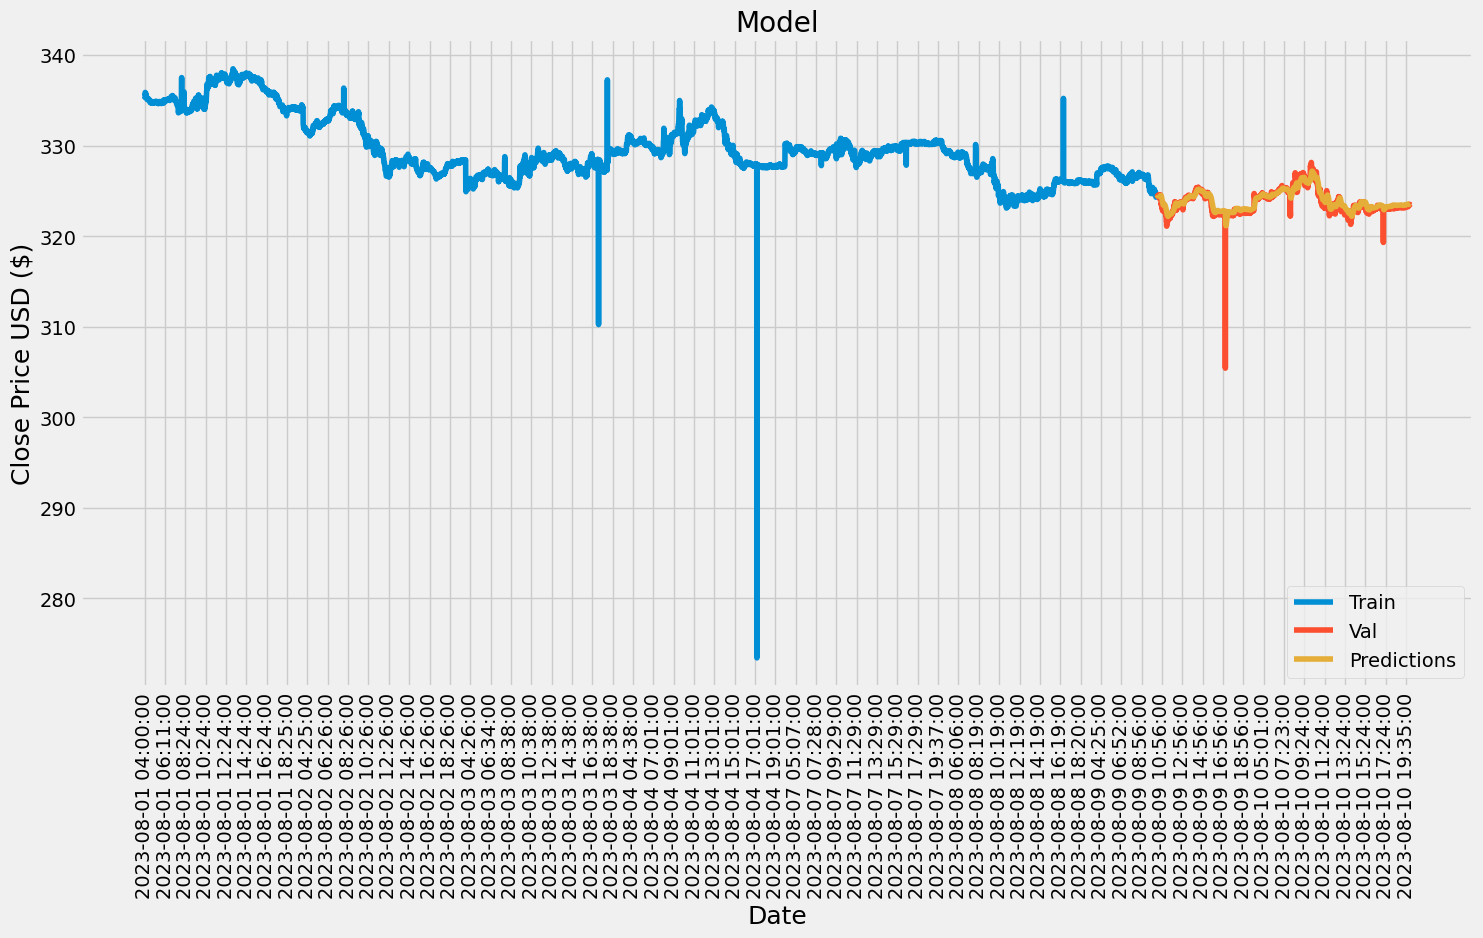

In [ ]:
#PLOT
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel ('Close Price USD ($)', fontsize=18)
plt.plot(train[ 'close' ])
plt.plot(valid[['close', 'Predictions']])
plt.xticks(range(0, len(df.index), 120), df.index[0::120], rotation=90)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# actual and predicted data
valid

,close,Predictions
2023-08-09 10:28:00,324.23,324.559479
2023-08-09 10:29:00,324.23,324.516510
2023-08-09 10:30:00,324.44,324.477417
2023-08-09 10:31:00,324.38,324.453461
2023-08-09 10:32:00,324.40,324.437225
...,...,...
2023-08-10 19:55:00,323.48,323.543060
2023-08-10 19:56:00,323.50,323.554688
2023-08-10 19:57:00,323.50,323.567749
2023-08-10 19:58:00,323.47,323.580902


In [ ]:
#FORCAST
MSFT_quote = web.DataReader('MSFT', data_source='av-intraday', start='2023-08-01', end='2023-08-12', api_key='https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&apikey=368NI7SFVG4K4RL0')
#Create a new dataframe
new_df = MSFT_quote. filter(['close'])
#Geting last 7 day closing price values and converting the dataframe to an array
last_07_days = new_df[-3360:].values
#Scale the data to be values between 0 and 1
last_07_days_scaled = scaler.transform(last_07_days)
#Create an empty list
X_test = []
#Append past 07 days
X_test.append(last_07_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 315ms/step
[[321.33185]]


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
r2

0.7862835396082092